In [10]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

In [11]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [12]:
df.marathon |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia


Fill in the table below:

In [14]:
# use dataframe to manually hardcode a table 

country_names = data.frame(
        country =c('United States','Kenya','Japan','United States'), 
        #give years to place our country labels along the x axis
        year = c(1915, 1955, 1990, 1980), 
        #we need a race time to place these labels along the y axis
        race.time = c(2.75, 2.25, 2,3),
        #create men's labels - use double quotes to enclose any label with apostrophe's
        MF = c("Men's") 
    )

country_names |> head()
#we can now use this table in our chart 



,country,year,race.time,MF
,<chr>,<dbl>,<dbl>,<chr>
1,United States,1915,2.75,Men's
2,Kenya,1955,2.25,Men's
3,Japan,1990,2.00,Men's
4,United States,1980,3.00,Men's


In [18]:
# we want to create annotations, to show the names of the 2 winners in 2018 
winners_2018 = df.marathon |> filter(year==2018) 
winners_2018 

winners_2018 |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2018,Desiree Linden,United States,2H 39M 54S,2.665000,Women's,United States


year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2018,Desiree Linden,United States,2H 39M 54S,2.665000,Women's,United States


Code your version of the chart below.

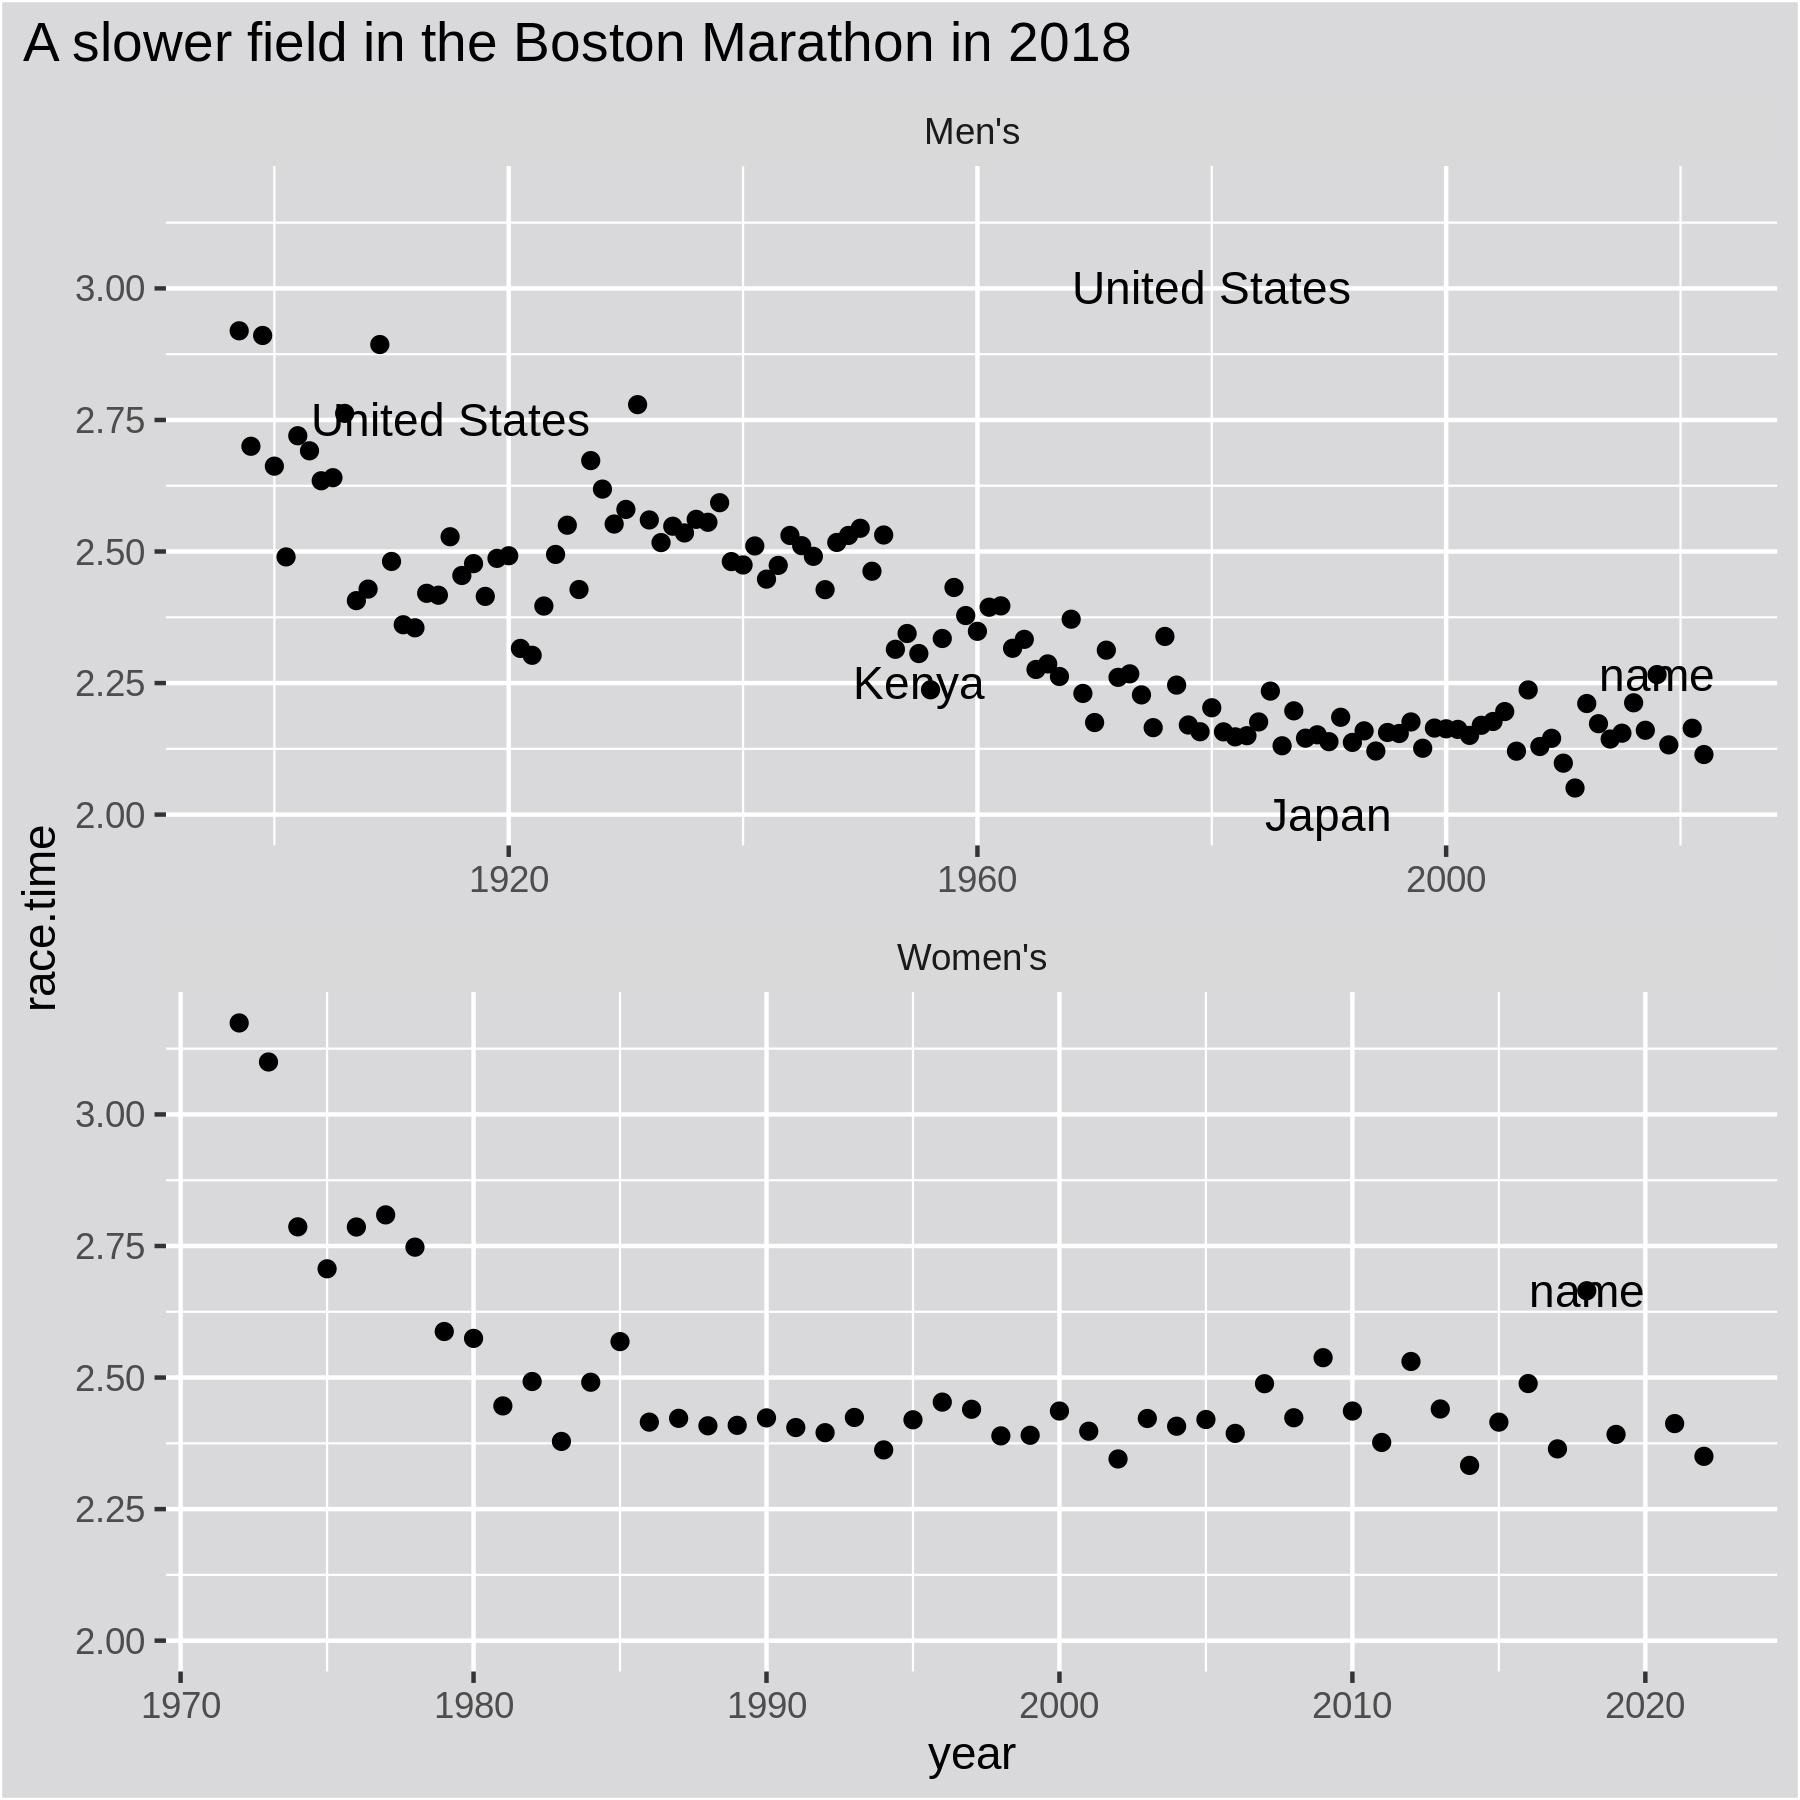

In [19]:
p = ggplot(df.marathon, aes(x = year, y = race.time)) + 
    geom_point() +
    #add labeled points to our chart, using the smaller dataset we created above 
    geom_text(data = country_names, aes(label = country)) +

    # add names to our chart, using the second smaller dataset we created above too 
    geom_text(data = winners_2018, label = 'name') +

    facet_wrap(~MF, ncol = 1, scales = 'free_x') +
    labs(title = 'A slower field in the Boston Marathon in 2018') + 
    theme(plot.title.position = 'plot',
          plot.background = element_rect(fill = '#d9d9db'),
          panel.background = element_rect(fill = '#d9d9db'))

p

$title
[1] "A slower field in 2018"

attr(,"class")
[1] "labels"

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'country.simple' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9.

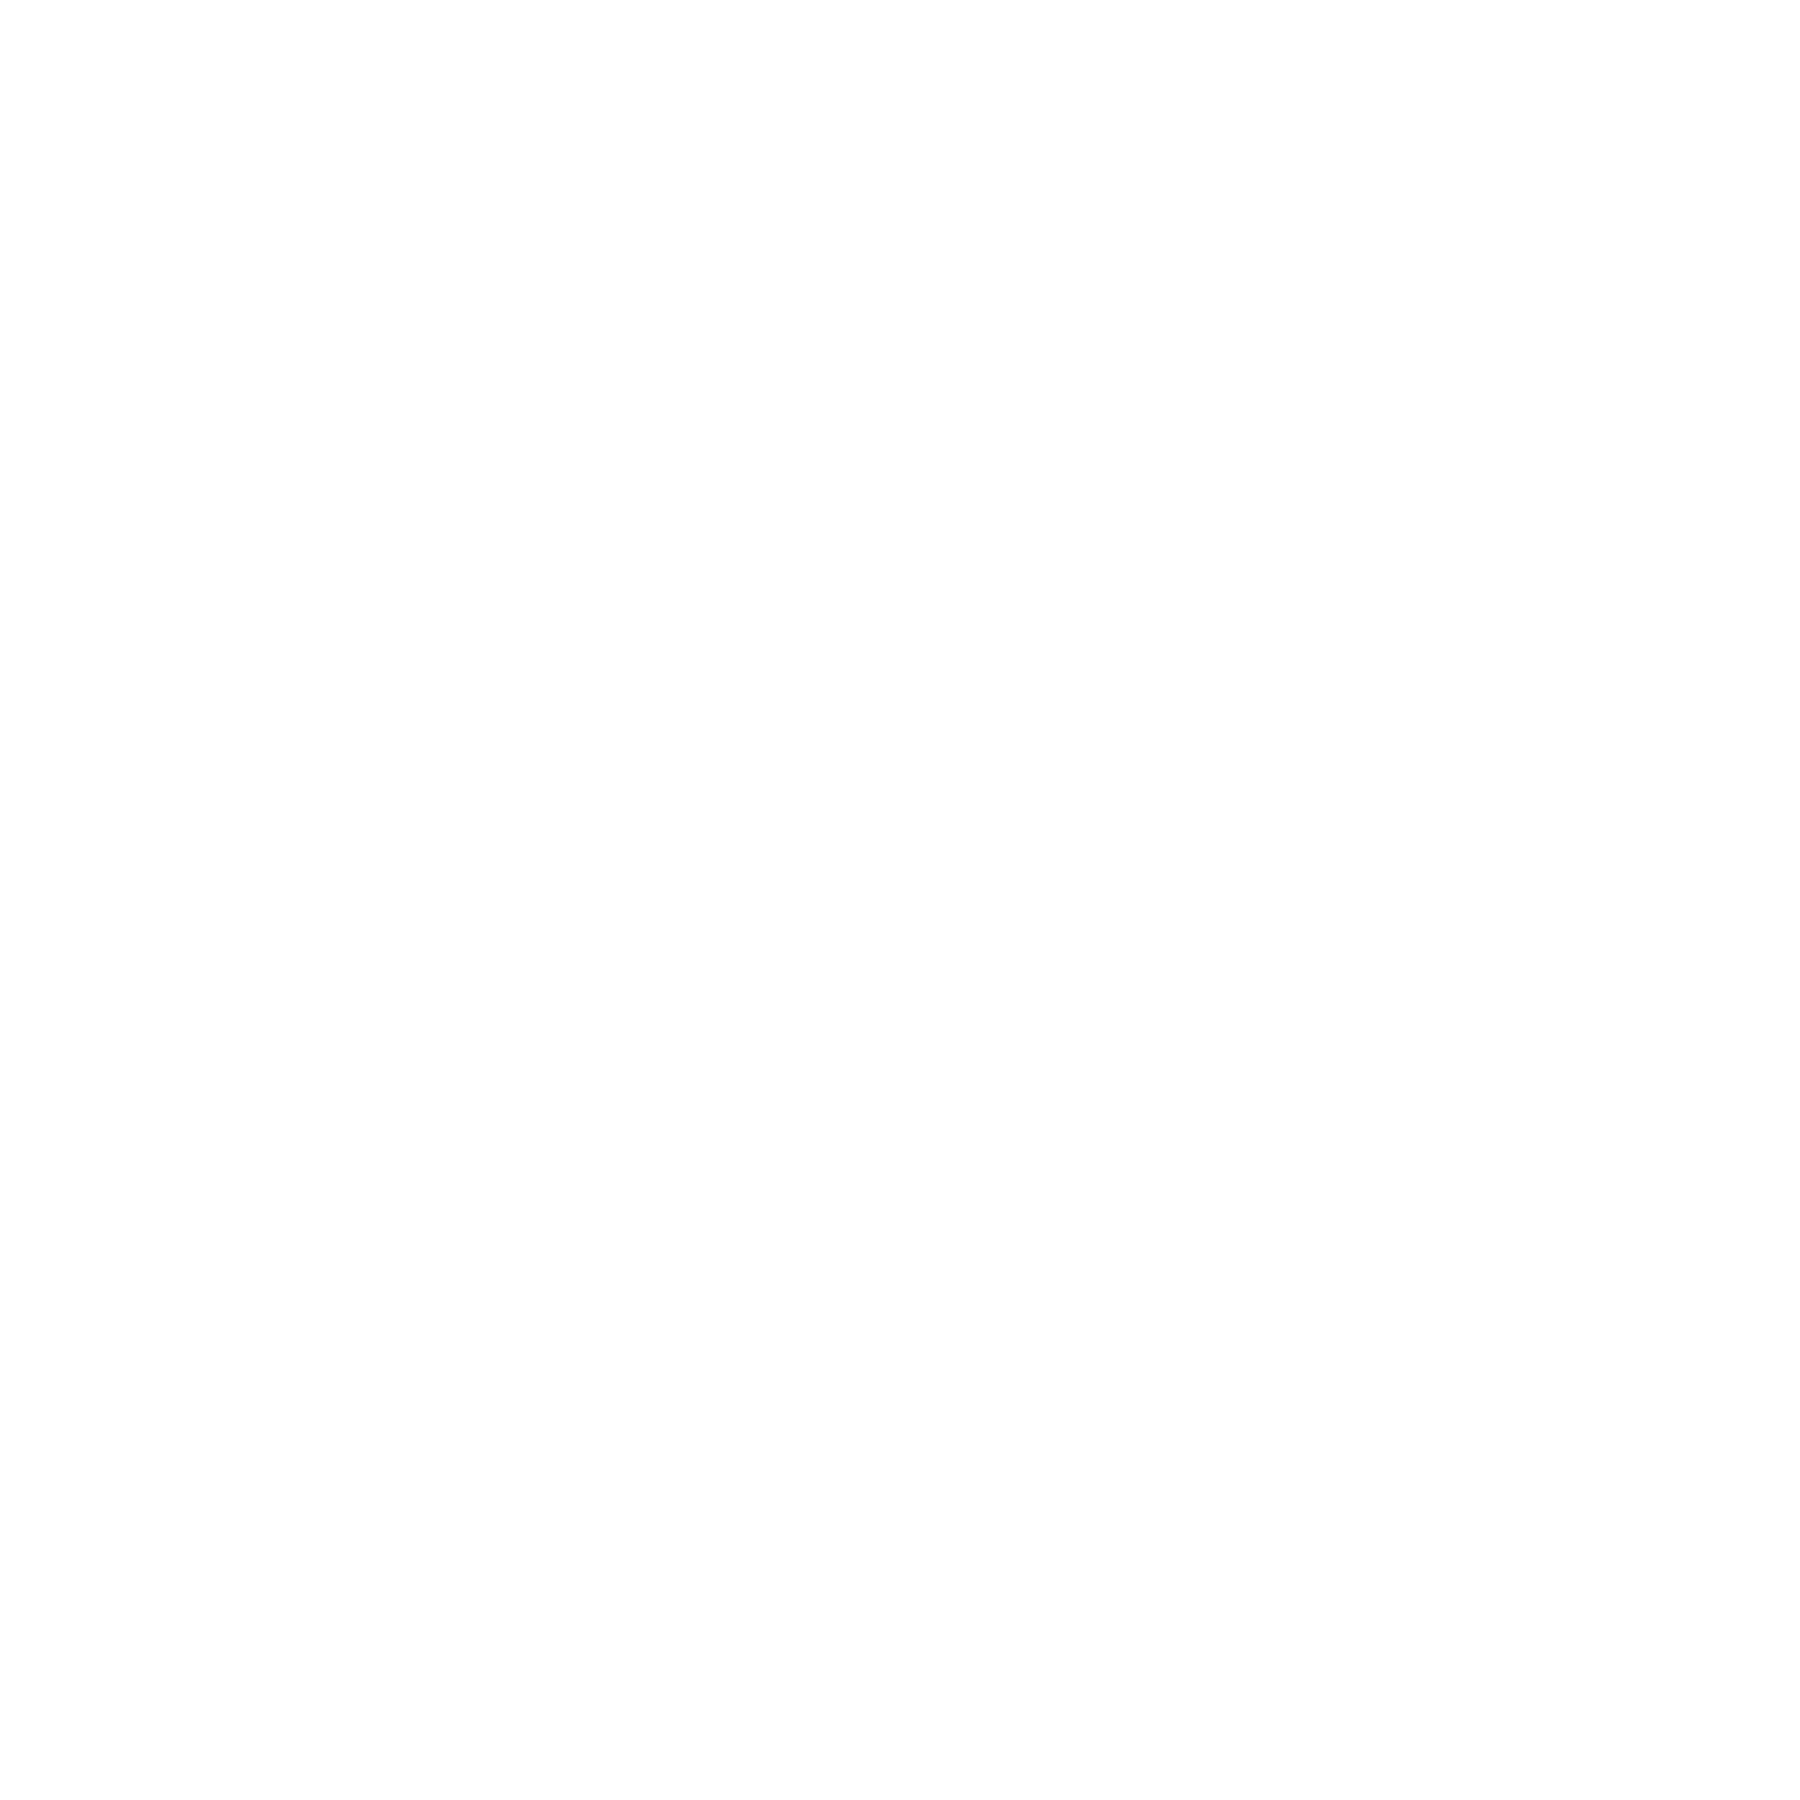

In [9]:
#this is my try at home 
#remember, df.marathon is your full table of data, and data.frame we'll use to add particular labels to our chart
p = ggplot(df.marathon, aes(x = year, y = race.time, color = country.simple)) +
    geom_point() + 
    facet_wrap(~MF, strip.position = "top",ncol = 1, scales = 'free_x')
    labs(title = 'A slower field in 2018')

    library('ggrepel')

    #filter the data points - we only want outlier points to be labeled in our graphs  
    filtered.data = df.marathon %>% filter(year >= 2018, race.time>2.266) #how do we filter differently for male and female?

    p + geom_text_repel(
            data = filtered.data,
            #this pushes our text above the points 
            nudge_y = 36 - filtered.data$race.time, 
            segment.size = 0.2,
            size = 3,
            segment.color = "grey50",
            aes(label = name)
        )
p

ERROR: Error in filter(marathon, 2018): object 'marathon' not found
